$$\large{Background}$$ 

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from scipy.stats import poisson

In [50]:
data = np.load('./data_HE.npy') 
rd.seed()

psi_bg = data[0]
Dec = data[1]
Ra = data[2]

pi = np.pi

In [51]:
# Rice criterion : 

bin_bg = 2*(len(Ra)**(1/3))
print('2D :')
print('\n Rice criterion : k = ', round(bin_bg,3))
print('\n taille échantillon : ', len(Ra))

bin_psi = 2*(len(psi_bg)**(1/3))
print('\n 1D : ')
print('\n Rice criterion : k = ', round(bin_psi,3))
print('\n taille échantillon psi : ', len(psi_bg))

2D :

 Rice criterion : k =  56.202

 taille échantillon :  22190

 1D : 

 Rice criterion : k =  56.202

 taille échantillon psi :  22190


In [52]:
def angle_solide(angle):
    return np.pi*angle**2

def psi_f(RA,decl):
    return np.arccos(np.cos(np.pi/2.-(-29.*np.pi/180))*np.cos(np.pi/2.-decl)\
                      +np.sin(np.pi/2.-(-29.*np.pi/180))*np.sin(np.pi/2.-decl)*\
                       np.cos(RA-266.*np.pi/180))

Text(0, 0.5, '$\\delta$ (deg)')

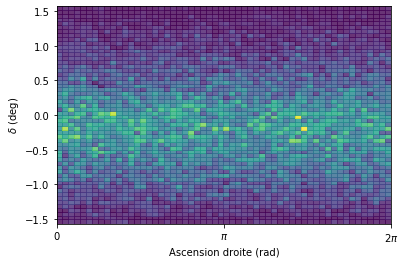

In [53]:
plt.figure()
Value_bg_2D = plt.hist2d(Ra,Dec, bins = [int(bin_bg),int(bin_bg)], density = True, alpha = 0.8)
plt.xticks(np.arange(0,2*pi+1,pi), ['0', '$\pi$', '$2 \pi$'])
plt.xlabel('Ascension droite (rad)')
plt.ylabel('$\delta$ (deg)')

$$ \large{H_0 = \mathcal{B}(\psi)} $$

Text(0, 0.5, 'Densité de probabilité')

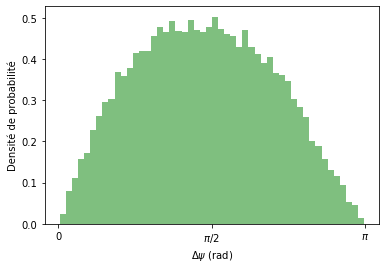

In [54]:
plt.figure()
Value_bg_psi = plt.hist(psi_bg, bins = 50, density = True, color = "green", alpha = 0.5)
plt.xticks(np.arange(0,pi+1,pi/2), ['0', '$\pi / 2$', '$ \pi$'])
plt.xlabel('$\Delta \psi$ (rad)')
plt.ylabel('Densité de probabilité')

$$ \large{Signal} $$ 

In [71]:
data_dm = np.load('./Signal_1000GeV.pkl',allow_pickle=True, encoding="latin1")

w = data_dm['weigths']
psi_rec = data_dm['psi_rec']
scrambled_psi = data_dm['scrambled_psi_reco']
E_reco = data_dm['energy_rec']

In [72]:
print('Taille psi_rec \n', len(psi_rec),'\n Taille scrambled_psi ', len(scrambled_psi), '\n Taille w', len(w))

max_w = np.max(w)
i = np.where(w == np.max(w))
w = np.delete(w,i)
psi_rec = np.delete(psi_rec,i)

print('Taille psi_rec \n', len(psi_rec),'\n Taille scrambled_psi ', len(scrambled_psi), '\n Taille w', len(w))

Taille psi_rec 
 59543400 
 Taille scrambled_psi  59543400 
 Taille w 59543400
Taille psi_rec 
 59543399 
 Taille scrambled_psi  59543400 
 Taille w 59543399


In [57]:
scrambled_psi = np.delete(scrambled_psi,i)

In [58]:
bin_signal = 2*(len(psi_rec)**(1/3))
print('bin signal :', bin_signal)

bin_signal_scr = 2*(len(scrambled_psi)**(1/3))
print('\n bin signal scr :',bin_signal_scr)

bin signal : 780.9823214204089

 bin signal scr : 780.9823214204089


$$ \large{ H_1 = \xi \mathcal{S}(\psi) + (1 - \xi)\mathcal{B}(\psi)}\xi$$

Text(0, 0.5, 'Densité de probabilité')

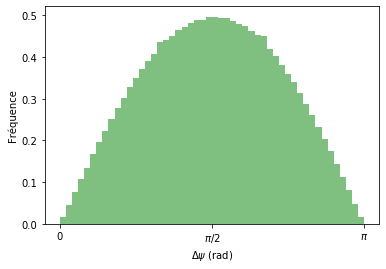

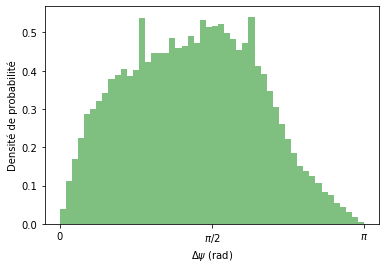

In [59]:
plt.figure()
plt.hist(scrambled_psi, bins = 50, color = "green", alpha = 0.5, density = True)
plt.xlabel('$\Delta \psi$ (rad)')
plt.xticks(np.arange(0,pi+1,pi/2), ['0', '$\pi / 2$', '$ \pi$'])
plt.ylabel('Fréquence')

plt.figure()
plt.hist(scrambled_psi, bins = 50, weights = w, color = "green", alpha = 0.5, density = True, stacked = True)
plt.xlabel('$\Delta \psi$ (rad)')
plt.xticks(np.arange(0,pi+1,pi/2), ['0', '$\pi / 2$', '$ \pi$'])
plt.ylabel('Densité de probabilité')

$$\Large\text{Signal à utiliser $S(\psi)$}$$

Text(0, 0.5, 'Densité de probabilité')

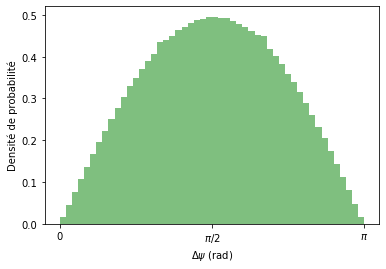

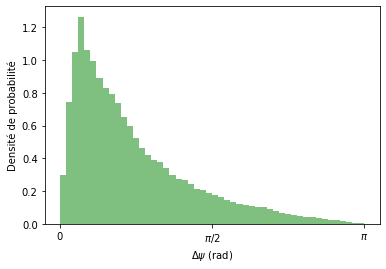

In [60]:
plt.figure()
plt.hist(psi_rec, bins = 50, color = "green", alpha = 0.5, density = True)
plt.xlabel('$\Delta \psi$ (rad)')
plt.xticks(np.arange(0,pi+1,pi/2), ['0', '$\pi / 2$', '$ \pi$'])
plt.ylabel('Densité de probabilité')

plt.figure()
signal_hist_w = plt.hist(psi_rec, bins = 50, weights = w, color = "green", alpha = 0.5, density = True, align = 'mid')
plt.xlabel('$\Delta \psi$ (rad)')
plt.xticks(np.arange(0,pi+1,pi/2), ['0', '$\pi / 2$', '$ \pi$'])
plt.ylabel('Densité de probabilité')

$$ \large\textit{Likelihood method : comparaison modèle simulé/bruit de fond avec signal/bruit de fond} $$

$$ \textbf{On cherche $\xi$ tel que la vraisemblance est max} $$

$$ \large{H_0 = \mathcal{B}(\psi)} $$

$$ \large{ H_1 = \xi \mathcal{S}(\psi) + (1 - \xi)\mathcal{B}(\psi)\xi,  \; \xi \in [0;1] } $$

$$\frac{H_1}{H_0} = TS \iff \frac{H_1}{H_0} = \frac{\xi \mathcal{S}(\psi)}{\mathcal{B}(\psi)} + (1-\xi) $$

$$ \textbf{Psi_test avec données} $$ 

In [73]:
def data(n, bg, signal, w):
    Nb = int(n*len(bg))
    Ns = int((1-n)*len(bg))
    frac_bg = np.random.choice(bg, Nb)
    frac_s = np.random.choice(signal, Ns, p = w/(np.sum(w)))
    data = np.concatenate((frac_bg,frac_s), axis = None)
    psi_test = plt.hist(data, bins = 50)
    return psi_test

In [74]:
n = 0.90
Nb = int(n*len(psi_bg))
Ns = int((1-n)*len(psi_bg))

frac_bg = np.random.choice(psi_bg, Nb)
frac_s = np.random.choice(psi_rec, Ns, p = w/(np.sum(w)))

print('Taille frac_bg :', len(frac_bg), 'frac_s :', len(frac_s))

psi_test = np.concatenate((frac_bg,frac_s), axis = None)
print('Taille psi test :', len(psi_test))

Taille frac_bg : 19971 frac_s : 2218
Taille psi test : 22189


$$\textbf{Psi test}$$ 

Text(0, 0.5, "Nb d'événements")

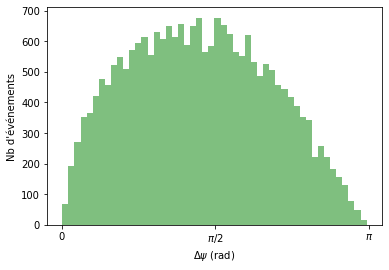

In [75]:
plt.figure()
psi_test_hist = plt.hist(psi_test, bins = 50, color = "green", alpha = 0.5)
plt.xlabel('$\Delta \psi$ (rad)')
plt.xticks(np.arange(0,pi+1,pi/2), ['0', '$\pi / 2$', '$ \pi$'])
plt.ylabel("Nb d'événements")

$$ \large\textbf{Vraisemblance} $$

$$ \mathcal{L} = \prod_{i = 0}^{Nbins} Poissons(n_i/\mu_i) $$ 

$$ \mu_i = \textbf{cmb d'events j'attends dans la boite i} $$ 

$$ \textbf{Cas sans signal} : \mu_i = N_T * B_i $$ 

$$ \mu_i = N_T[(1-\lambda)B_i + \lambda S_i], \lambda \; \textbf{paramètre libre/cmb de signal}$$ 

$$ log(\mathcal{L}) = \sum_{i = 0}^{Nbins} log(Poissons(n_i/\mu_i)) $$

In [76]:
def likelihood(lamb,B,S,psi):
    mu = len(psi[0])*((1-lamb)*B + lamb*S)
    L = 0
    L = psi[0]*np.log(mu) - mu
    return -np.sum(L)

In [77]:
# On doit trouver le lambda qui maximise L : essayer plusieurs valeurs de lambda (range entre 0 et 1)

# Normalisation : 
data_bg = Value_bg_psi[0] / np.sum(Value_bg_psi[0])
data_signal = signal_hist_w[0] / np.sum(signal_hist_w[0])

Nvalues = len(psi_test_hist[0])
lamb = np.linspace(0, 1, Nvalues)
L = np.empty(Nvalues)

for k in range(Nvalues):
    L[k] = likelihood(lamb[k], data_bg, data_signal, psi_test_hist)

i_min = np.where(L == np.min(L))
lambda_min = lamb[i_min]
print('\n Fraction de signal dans le jeu de données :', lambda_min)

xmin = lambda_min
ymin = L[i_min]


 Fraction de signal dans le jeu de données : [0.10204082]


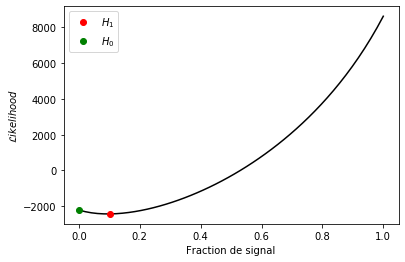

In [78]:
plt.figure()
plt.plot(lamb, L, 'k')
plt.plot(xmin, ymin, 'ro', label = '$H_1$')
plt.plot(0, L[0], 'go', label = '$H_0$')
plt.xlabel('Fraction de signal')
plt.ylabel('$\mathcal{L}ikelihood$')
plt.legend()

$$\textbf{Test statistique}  $$ 

$$\textbf{Hypothèse sans signal :} \mathcal{L}(0)$$ 

$$\rightarrow \textbf{faire tourner N fois et plot} \; TS = -2log\frac{\mathcal{L}(\chi)}{\mathcal{L}(0)}$$

In [79]:
def printProgress (iteration, total, prefix = '', suffix = '', decimals = 1, length = 40, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

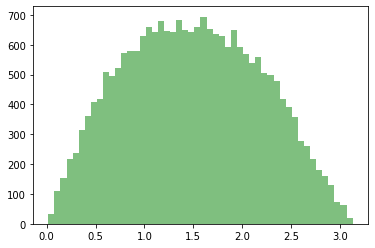

In [81]:
# Fluctuations du bg :

Value_bg_psi_samp = plt.hist(psi_bg, bins = 50, color = "green", alpha = 0.5) # pas normalisé

def BackgroundSampleGenerator():
    bg_hist_fluc = []
    for mu in Value_bg_psi_samp[0]:
        bg_hist_fluc.append(np.random.poisson(mu,1)[0])
    
    bg_hist_fluc = np.array(bg_hist_fluc)
    bg_hist_fluc = bg_hist_fluc * np.sum(Value_bg_psi_samp[0])/np.sum(bg_hist_fluc)
    return bg_hist_fluc, Value_bg_psi_samp[1]

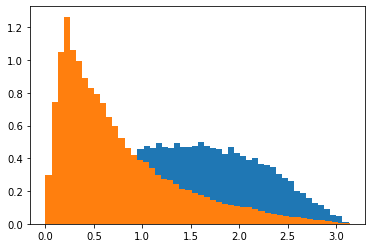

In [85]:
bg_hist = plt.hist(psi_bg, bins = 50, density = True)
sig_hist = plt.hist(psi_rec, bins = 50, weights = w, density = True)
bg = bg_hist[0] / np.sum(bg_hist[0])
sig = sig_hist[0] / np.sum(sig_hist[0])

def TS(likelihood, N, data_sig, data_bg, w):
    TS = np.empty(N)
    for i in range(N):
        printProgress(i, N, prefix = 'Progression:', suffix = 'Effectué')
        data_list = BackgroundSampleGenerator()
        Nvalues = len(data_list[0])
        lamb = np.linspace(0, 1, Nvalues)
        L = np.empty(Nvalues)
        for k in range(Nvalues):
            L[k] = likelihood(lamb[k], bg, sig, data_list)
        xmin = lambda_min
        i_min = np.where(L == np.min(L))
        TS[i] = np.abs(2*np.log(L[i_min]/L[0]))
    return TS

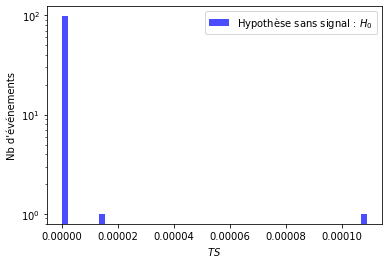

In [86]:
N2 =  np.linspace(0, 1, 100)
TS_2 = TS(likelihood, len(N2), psi_rec, psi_bg, w)

plt.figure()
TS_100 = plt.hist(TS_2, bins = 50, color = "blue", alpha = 0.7, histtype = 'stepfilled', label ='Hypothèse sans signal : $H_0$')
plt.yscale('log')
plt.xlabel('$TS$')
plt.ylabel("Nb d'événements")
plt.legend()

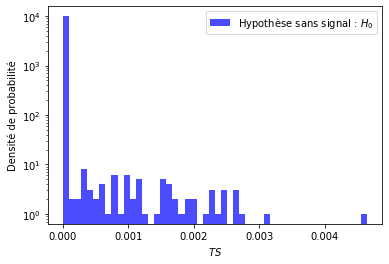

In [88]:
N3 =  np.linspace(0, 1, 10000)
TS_3 = TS(likelihood, len(N3), psi_rec, psi_bg, w)


plt.figure()
TS_3000 = plt.hist(TS_3, bins = 50, color = "blue", alpha = 0.7, histtype = 'stepfilled', label ='Hypothèse sans signal : $H_0$')
plt.yscale('log')
plt.xlabel('$TS$')
plt.ylabel('Densité de probabilité')
plt.legend()

Mettre les valeurs de TS dans un hist
Trouver la valeur de TS_5sig / TS_3sig plutôt grâce à une fonction gaussienne 
Trouver la fraction de signal qui correspond à une gaussienne où la médiane est TS_5sig ou TS_3sig